## 1· Matplotlib
1·1 An example showing how to plot the coherence of two signals
      #一个展示如何绘制两个信号的相干性的例子。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

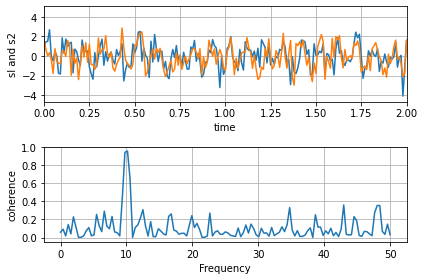

In [8]:
# Fixing random state for reproducibility #为再现性固定随机状态
np.random.seed(19680801)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))   # white noise 1
nse2 = np.random.randn(len(t))   # white noise 2

# Two signals with a coherent part at 10Hz and a random part
# 一个展示如何绘制两个信号的相干性的例子。
s1 = np.sin(2 * np.pi * 10 * t) + nse1
s2 = np.sin(2 * np.pi * 10 * t) + nse2

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_yticks(np.linspace(-4, 4, 5)) #设置轴上的取点-4~4取5个点
axs[0].set_xlabel("time")
axs[0].set_ylabel('sl and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')
axs[1].set_yticks(np.linspace(0., 1., 6)) #设置轴上的取点

fig.tight_layout()
plt.savefig("image02.png")
plt.show()

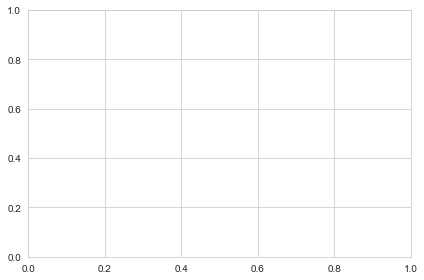

TypeError: float() argument must be a string or a number, not 'function'

<Figure size 1080x720 with 3 Axes>

In [4]:
import numpy as np
from math import pi,cos
from matplotlib import animation
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation  # 动图的核心函数
import seaborn as sns  # 美化图形的一个绘图包

sns.set_style("whitegrid")  # 设置图形主图

# 创建画布
fig, ax = plt.subplots()
fig.set_tight_layout(True)

# 创建画布，包含3个子图
fig = plt.figure(figsize=(15, 10))
ax1  = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

# 先绘制初始图形，子图分别为两个不同频率的简谐波和其合成波
x = np.arange(-50,50,0.01)
# y1 = 5*np.sin(2.1*x+np.pi*3)
# y2 = 8*np.sin(2*x+np.pi*3)
# y3 = y1 + y2
def y1(x):
    y11=5*np.sin(2.1*x+np.pi*3)
    return y11
def y2(x):
    y22=8*np.sin(2*x+np.pi*3)
    return y22
def y3(x):
    y33 = y1(x) + y2(x)
    return y33

line1, = ax1.plot(x, y1(x)) 
line2, = ax2.plot(x, y2(x))
line3, = ax3.plot(x, y3(x)) 

def init():
    # 构造开始帧函数init
    # 改变y轴数据，x轴不需要改
    line1.set_ydata(y1)
    line2.set_ydata(y2)
    line3.set_ydata(y3)
    label = 'timestep {0}'.format(0)
    ax1.set_xlabel(label)
    return line1,line2,line3  # 注意返回值，我们要更新的就是这些数据

def animate(i):
    # 接着，构造自定义动画函数animate，用来更新每一帧上各个x对应的y坐标值，参数表示第i帧
    # plt.cla() 这个函数很有用，先记着它
    line1.set_ydata(y1(x + i/10.0))
    line2.set_ydata(y2(x + i / 10.0))
    line3.set_ydata(y3(x + i / 10.0))
    label = 'timestep {0}'.format(i)
    ax1.set_xlabel(label)
    return line1,line2,line3

# 接下来，我们调用FuncAnimation函数生成动画。参数说明：
# fig 进行动画绘制的figure
# func 自定义动画函数，即传入刚定义的函数animate
# frames 动画长度，一次循环包含的帧数
# init_func 自定义开始帧，即传入刚定义的函数init
# interval 更新频率，以ms计
# blit 选择更新所有点，还是仅更新产生变化的点。应选择True，但mac用户请选择False，否则无法显示动画

ani = animation.FuncAnimation(fig=fig,
                              func=animate,
                              frames=100,
                              init_func=init,
                              interval=20,
                              blit=True)
plt.show()
# ani.save(r'E:\作业\高等光学\程序\振动合成\demoanimation.gif', writer='imagemagick', fps=2)
# ani.save("振动合成.gif",writer='pillow')

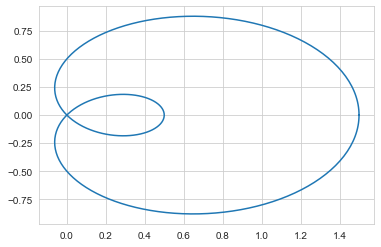

In [11]:
import numpy as np
from scipy.interpolate import splprep, splev

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

N = 400
t = np.linspace(0, 2 * np.pi, N)
r = 0.5 + np.cos(t)
x, y = r * np.cos(t), r * np.sin(t)

fig, ax = plt.subplots()
ax.plot(x, y)
plt.savefig("image03.png")
plt.show()

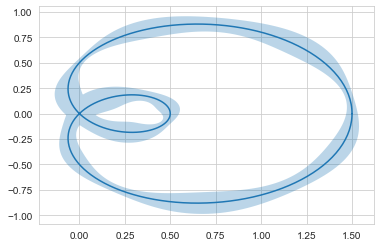

In [12]:
# Error amplitudes depending on the curve parameter *t*
# (actual values are arbitrary and only for illustyative purpose):
err = 0.05 * np.sin(2 * t) ** 2 + 0.04 + 0.02 * np.cos(9 * t + 2)

# calculate normals via derivatives of splines
tck, u = splprep([x,y], s=0)
dx, dy = splev(u, tck, der=1)
l = np.hypot(dx, dy)
nx = dy / l
ny = -dx /l

# end points of errors 
xp = x + nx * err
yp = y + ny * err
xn = x - nx * err
yn = y - ny * err
 
vertices = np.block([[xp, xn[::-1]],
                   [yp, yn[::-1]]]).T
codes = Path.LINETO * np.ones(len(vertices), dtype=Path.code_type)
codes[0] = codes[len(xp)] = Path.MOVETO
path = Path(vertices, codes)

patch = PathPatch(path, facecolor='C0', edgecolor='none', alpha=0.3)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.add_patch(patch)
plt.savefig("image04.png")
plt.show()

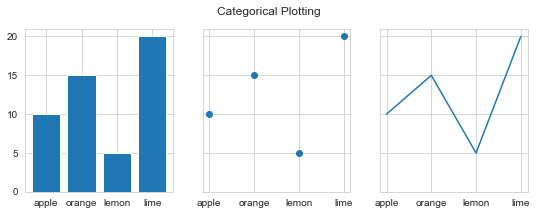

In [13]:
 import matplotlib.pyplot as plt
    
data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')
plt.savefig("image05.png")

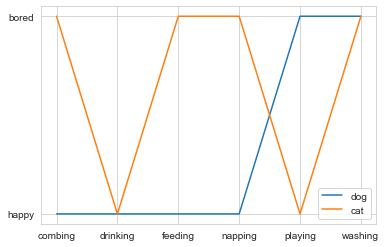

In [14]:
cat = ["bored", "happy", "bored", "bored", "happy", "bored"]
dog = ["happy", "happy", "happy", "happy", "bored", "bored"]
activaty = ["combing", "drinking", "feeding", "napping", "playing", "washing"]

fig, ax = plt.subplots()
ax.plot(activaty, dog, label="dog")
ax.plot(activaty, cat, label="cat")
ax.legend()
plt.savefig("image06.png")
plt.show()

## 轴的参数误差。errorbar只能用于在数据点的子集上绘制错误条。如果有许多数据点具有类似的错误，这一点特别有用。

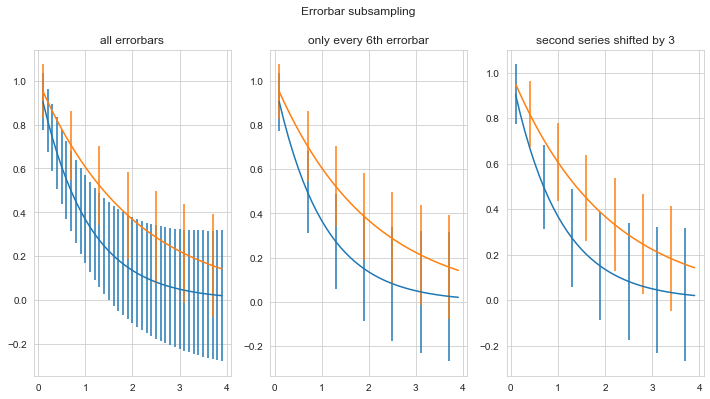

In [16]:
import numpy as np 
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.1)
y1 = np.exp(-1.0 * x)
y2 = np.exp(-0.5 * x)

# example varivable error bar values
y1err = 0.1 + 0.1 * np.sqrt(x)
y2err = 0.1 + 0.1 * np.sqrt(x/2)


fig,(ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True,
                                  figsize=(12, 6))

ax0.set_title('all errorbars')
ax0.errorbar(x, y1, yerr=y1err)
ax0.errorbar(x, y2, yerr=y2err, errorevery=6)

ax1.set_title('only every 6th errorbar')
ax1.errorbar(x, y1, yerr=y1err, errorevery=6)
ax1.errorbar(x, y2, yerr=y2err, errorevery=6)

ax2.set_title('second series shifted by 3')
ax2.errorbar(x, y1, yerr=y1err, errorevery=(0, 6))
ax2.errorbar(x, y2, yerr=y2err, errorevery=(3, 6))

fig.suptitle('Errorbar subsampling')
plt.savefig("image07.png")
plt.show()

## Eventplot演示
一个显示具有不同行属性的事件序列的事件图。图以水平方向和垂直方向显示。

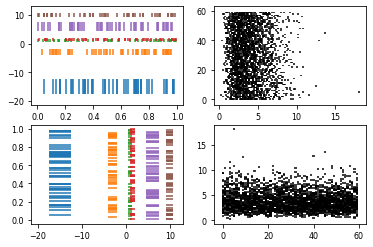

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['font.size'] = 8.0

# Fixing random state for reproducibility
np.random.seed(19680801)


# create random data
data1 = np.random.random([6, 50])

# set different colors for each set of positions
colors1 = ['C{}'.format(i) for i in range(6)]

# set different lline properties for each set of positions
# note that some overlap
lineoffsets1 = [-15, -3, 1, 1.5, 6, 10]
linelengths1 = [5, 2, 1, 1, 3, 1.5]

fig, axs = plt.subplots(2, 2)

# create a horizontal plot
axs[0, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                   linelengths=linelengths1)

# create a vertical plot
axs[1, 0].eventplot(data1, colors=colors1, lineoffsets=lineoffsets1,
                   linelengths=linelengths1, orientation='vertical')

# create another set of random data
# the gamma distribution is only used for aesthetic purposes
data2 = np.random.gamma(4, size=[60, 50])

# use individual values for the parameters this time 
# these values will be used for all data sets (except lineoffsets2, which
# sets the increment between each data set in this usage)
colors2 = 'black'
lineoffsets2 = 1
linelengths2 = 1

# create a horizontal plot
axs[0, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2,
                   linelengths=linelengths2)

# create a vertical plot
axs[1, 1].eventplot(data2, colors=colors2, lineoffsets=lineoffsets2, 
                   linelengths=linelengths2, orientation='vertical')

plt.savefig("image09.png")
plt.show()

## Errorbar限制选择
使用误差条的参数uplims, lolims有选择地在误差条上绘制下限和/或上限符号的说明。
或者，你可以使用2xN值在一个方向上绘制误差条。

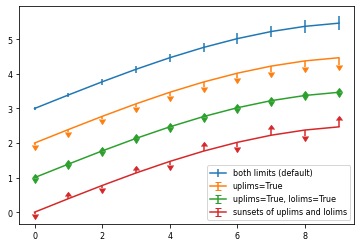

In [8]:
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)

plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)')

plt.errorbar(x, y + 2, yerr=yerr, uplims=True, label='uplims=True')

plt.errorbar(x, y + 1, yerr=yerr, uplims=True, lolims=True,
            label='uplims=True, lolims=True')

upperlimits = [True, False] * 5
lowerlimits = [False, True] * 5
plt.errorbar(x, y, yerr=yerr, uplims=upperlimits, lolims=lowerlimits,
            label='sunsets of uplims and lolims')

plt.legend(loc='lower right')

plt.savefig("image10.png")
plt.show()

## 类似地，xuplims和xlolims也可以用于水平xerr错误栏。

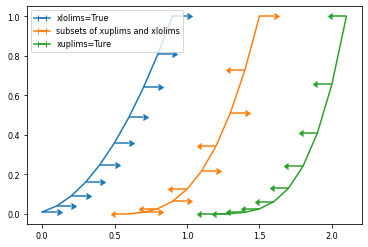

In [11]:
fig = plt.figure()
x = np.arange(10) / 10
y = (x + 0.1)**2

plt.errorbar(x, y, xerr=0.1, xlolims=True, label='xlolims=True')
y = (x + 0.1)**3

plt.errorbar(x + 0.6, y, xerr=0.1, xuplims=upperlimits, xlolims=lowerlimits,
            label='subsets of xuplims and xlolims')

y = (x + 0.1)**4
plt.errorbar(x + 1.2, y, xerr=0.1, xuplims=True, label='xuplims=Ture')

plt.legend()
plt.savefig("image11.png")
plt.show()

# 带标签的分组条形图
这个例子展示了如何创建分组条形图以及如何用标签标注条形图。

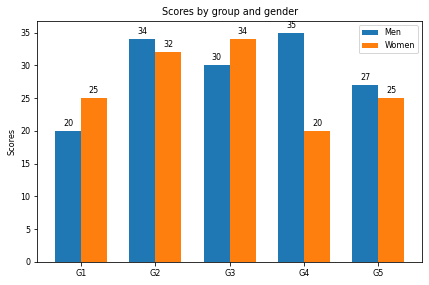

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 3),     # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom')

        
        
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig("image12.png")
plt.show()

## 打破Barh
制作一个“破碎的”横杆图，也就是有缺口的横杆图

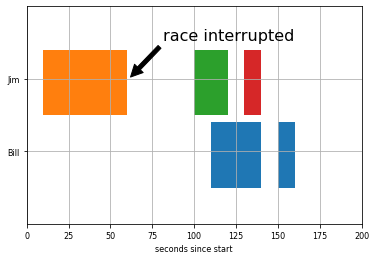

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.broken_barh([(110, 30), (150, 10)], (10, 9), facecolors='tab:blue')
ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
              facecolors=('tab:orange', 'tab:green', 'tab:red'))
ax.set_ylim(5, 35)
ax.set_xlim(0, 200)
ax.set_xlabel('seconds since start')
ax.set_yticks([15, 25])
ax.set_yticklabels(['Bill', 'Jim'])
ax.grid(True)
ax.annotate('race interrupted', (61, 25),
           xytext=(0.8, 0.9), textcoords='axes fraction',
           arrowprops=dict(facecolor='black', shrink=0.05),
           fontsize=16,
           horizontalalignment='right', verticalalignment='top')
plt.savefig("image12.png")
plt.show()

## 水平条形图
这个例子展示了一个简单的水平条形图。

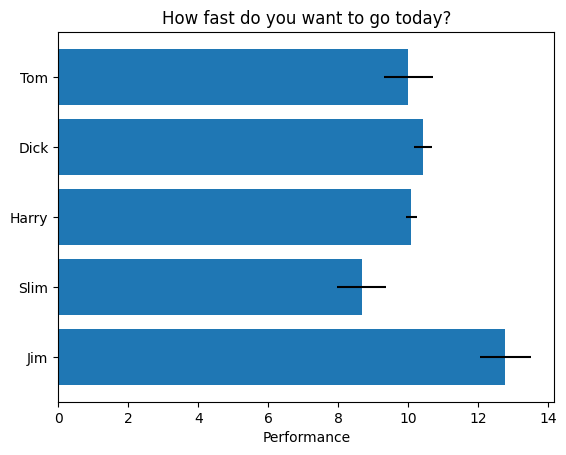

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis() # lables read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.savefig("image16.png")
plt.show()